# STAT 345: Nonparametric Statistics

## Lesson 02.1: Hypothesis Testing

**Reading: Conover Sections 2.3-2.5**

*Prof. John T. Whelan*

Thursday 23 January 2025

These lecture slides are in a computational notebook.  You have access to them through http://vmware.rit.edu/

Flat HTML and slideshow versions are also in MyCourses.

The notebook can run Python commands (other notebooks can use R or Julia; "Ju-Pyt-R").  Think: computational data analysis, not "coding".

Standard commands to activate inline interface and import libraries:

In [1]:
%matplotlib inline

In [2]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (8.0,5.0)
plt.rcParams['font.size'] = 14

- Last time: confidence intervals (parameter estimation)

- Today: **hypothesis testing**. Given a set of data ${{\mathbf{x}}}\equiv x_1,\ldots,x_n\equiv\{x_i\}$, wish to distinguish between competing statements about probability distribution $f({{\mathbf{x}}})$ describing the random vector ${{\mathbf{{\color{royalblue}{X}}}}}$ of which ${{\mathbf{x}}}$ is supposed to be an instance.

- We call them the **null hypothesis** $H_0$ and the **alternative hypothesis** $H_1$.

- In a Bayesian approach, would make a comparison between posterior probabilities $P(H_0|{{\mathbf{x}}})$ and $P(H_1|{{\mathbf{x}}})$, but in classical statistics, have to make an indirect statment involving possible probability distributions for ${{\mathbf{{\color{royalblue}{X}}}}}$.

- Classical hypothesis testing treats the two hypotheses differently. The null hypothesis $H_0$ describes absence of some effect which is present in $H_1$.

- Hypothesis test: rule for choosing between hypotheses given observed data ${{\mathbf{x}}}$, but not as simple as “pick $H_0$” or “pick $H_1$”. The two possibilities are:
1.  Reject $H_0$ (in favor of $H_1$).
2.  Don’t reject $H_0$.

- At no point do we actually *accept* either hypothesis. Negative test result doesn’t mean we rule out the effect described by $H_1$; sometimes the data just don’t contain enough information to see it.

- Terminology: $n$-dimensional “sample space” w/coordinates $(x_1,\ldots,x_n)$).  The set of points for which the test says to reject $H_0$ is known as the **critical region** or **rejection region**.

- Concrete example: sample of size $n$ drawn from some distribution w/mean $\mu$ and variance $\sigma$.

- Let $H_0$ specify that $\mu=0$ and $H_1$ that $\mu>0$.

- We define a test that rejects $H_0$ if
$$z = \frac{{{\overline{x}}}}{\sigma/\sqrt{n}} > 1.645$$ (where
${{\overline{x}}}$ is the sample mean of the data and we assume both
hypotheses specify the value $\sigma$ of the population standard
deviation) and fails to reject if $z\le 1.645$.

- The value $z$ is a realization of the random variable
$${\color{royalblue}{Z}} = \frac{{\color{royalblue}{{{\overline{X}}}}}}{\sigma/\sqrt{n}}$$
which is known as a **test statistic**.

### Significance

- If there were no uncertainty or randomness, you could define a "perfect" hypothsis test;  If $H_1$ were true, the test would reject $H_0$, and if $H_0$ were true, the test would not reject it.

- Instead, there's a chance the test will give the "wrong" answer.
  * Rejecting $H_0$ if it’s true is a **Type I Error** or false alarm.
  * Not rejecting $H_0$ if $H_1$ is true is known as a **Type II Error** or a false dismissal.

- Probability of a Type I error is $\alpha$, known as the **significance** of the test.

- If $H_0$ uniquely determines a sampling distribution $f({{\mathbf{x}}}|H_0)$, we call $H_0$ a **point hypothesis**, and $\alpha$ is the probability the data will end up in the critical region, assuming $H_0$ is true.

For example, go back to the test which rejects $H_0$: $\mu=0$ if $z = \frac{{{\overline{x}}}}{\sigma/\sqrt{n}} > 1.645$.

- If $n$ is large, the Central Limit Theorem says test statistic ${\color{royalblue}{Z}}$ is a standard normal, so
$$\alpha = P({\color{royalblue}{Z}}>1.645|\mu{\mathbin{=}}0)
  \approx P({\color{royalblue}{Z}}>z_{.95}|\mu{\mathbin{=}}0) \approx 0.05$$

- We say that the test has significance $\alpha=5\%$.

- The name "significance" is somewhat confusing, since since rejecting $H_0$ with test with a smaller $\alpha$ level, would actually be a *more* significant result.)

- If $H_0$ doesn't completely specify a sampling distribution (e.g., if we had chosen $\mu\le 0$ rather than $\mu=0$) it's called a **composite hypothesis**, and $\alpha$ is defined to be the maximum of all the false alarm probabilities associated with the different distributions allowed by $H_0$. (In this case that would turn out to be when $\mu=0$ anyway, so the significance would still be $5\%$.)

Can use a Monte Carlo simulation to illustrate/check the significance of the test we've just defined.

In principle, our test is supposed to work for any sampling distribution, but we'll use a normal distribution for convenience:

In [3]:
nulldist = stats.norm(scale=5)
sigma = nulldist.std()
print('Null distribution has mu=%g and sigma=%g' % (nulldist.mean(),sigma))

Null distribution has mu=0 and sigma=5


We'll generate $N=1000$ samples of size $n=50$, and call them $\{x_i^{(I)}\}$:

In [4]:
n = 50
Nmonte = 1000
np.random.seed(20250123)
x_Ii = nulldist.rvs(size=(Nmonte,n))

As we did when constructing confidence intervals, we take the mean of each sample, $\overline{x}^{(I)}=\frac{1}{n}\sum_{i=1}^n x_i^{(I)}$, and also construct the test statistic $z^{(I)}=\frac{\overline{x}^{(I)}}{\sigma/\sqrt{n}}$:

In [5]:
xbar_I = np.mean(x_Ii,axis=-1); xbar_I.shape, xbar_I[:10]

((1000,),
 array([-0.34732274,  0.88875124, -0.14278525, -0.07735406,  1.32079567,
        -0.73620115,  0.2837537 ,  0.47252245,  0.50647781,  0.22193611]))

In [6]:
z_I = xbar_I/(sigma/np.sqrt(n)); z_I.shape, z_I[:10]

((1000,),
 array([-0.49118852,  1.25688406, -0.20192884, -0.10939515,  1.86788714,
        -1.04114565,  0.40128833,  0.66824766,  0.71626778,  0.31386506]))

We can count how many of the 1000 $z^{(I)}$ are above the threshold of $1.645$ with a Boolean array:

In [7]:
reject_I = z_I>1.645; reject_I[:10]

array([False, False, False, False,  True, False, False, False, False,
       False])

In [8]:
reject_I = z_I>1.645; reject_I[:10]

array([False, False, False, False,  True, False, False, False, False,
       False])

In [9]:
print('Simulating with H_0 (mu=0), we reject H_0 %d times out of %d, or %g of the time'
      % (np.sum(reject_I),Nmonte,np.mean(reject_I)))

Simulating with H_0 (mu=0), we reject H_0 57 times out of 1000, or 0.057 of the time


You can go back and try it again with a different random number seed, or some other distribution.  As long as the mean is zero and the standard deviation is finite, it should still give you about 5\% significance.

### Power of a Test

- Probability of type II error (false dismissal, failing to reject $H_0$ when $H_1$ is true) is written $\beta$. 

- Probability of *rejecting* $H_0$ when $H_1$ is true is called the **power** of the test, $\gamma=1-\beta$.

- Since the alternative hypothesis $H_1$ is often a composite hypothesis, the power of a test can depend on the value of any parameters that are not completely specified by $H_1$.

- We can talk about a **power curve** $\gamma(\theta)$ where $\theta$ is the parameter in question.

- Recall the test which rejects $H_0$: $\mu=0$ if $z = \frac{{{\overline{x}}}}{\sigma/\sqrt{n}} > 1.645$.

- What happens under $H_1$: $\mu>0$? Central Limit Theorem tells us
$$\frac{{\color{royalblue}{{{\overline{X}}}}}-\mu}{\sigma/\sqrt{n}}=\frac{{\color{royalblue}{{{\overline{X}}}}}}{\sigma/\sqrt{n}}-\frac{\mu}{\sigma/\sqrt{n}}  = {\color{royalblue}{Z}} - \frac{\mu}{\sigma/\sqrt{n}}$$
is standard-normal distributed whatever the value of $\mu$.

- This means ${\color{royalblue}{Z}}$ is normally distributed with unit variance ($V({\color{royalblue}{Z}})=1$) but
nonzero mean $$E({\color{royalblue}{Z}}) = \frac{\mu}{\sigma/\sqrt{n}}$$

- So the power curve is
$$\gamma(\mu) = P({\color{royalblue}{Z}}>1.645|\mu)
  = 1-\Phi\left(1.645-\frac{\mu}{\sigma/\sqrt{n}}\right)$$

We can plot $\gamma(\mu) = 1-\Phi\left(1.645-\frac{\mu}{\sigma/\sqrt{n}}\right)$ as a function of the "scaled $\mu$" i.e., $\frac{\mu}{\sigma/\sqrt{n}}$

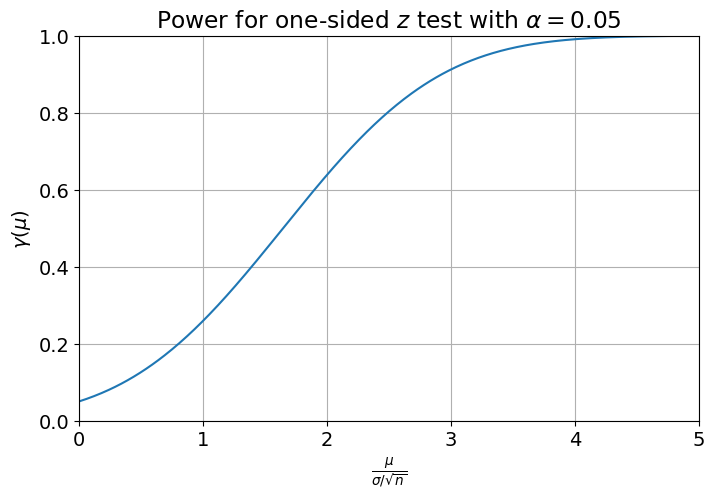

In [10]:
muscaled_m = np.linspace(0,5,501)
gamma_m = stats.norm.sf(1.645-muscaled_m)
plt.plot(muscaled_m,gamma_m)
plt.xlabel(r'$\frac{\mu}{\sigma/\sqrt{n}}$'); plt.ylabel(r'$\gamma(\mu)$');
plt.title(r'Power for one-sided $z$ test with $\alpha=0.05$');  plt.xlim(0,5); plt.ylim(0,1); plt.grid(True);

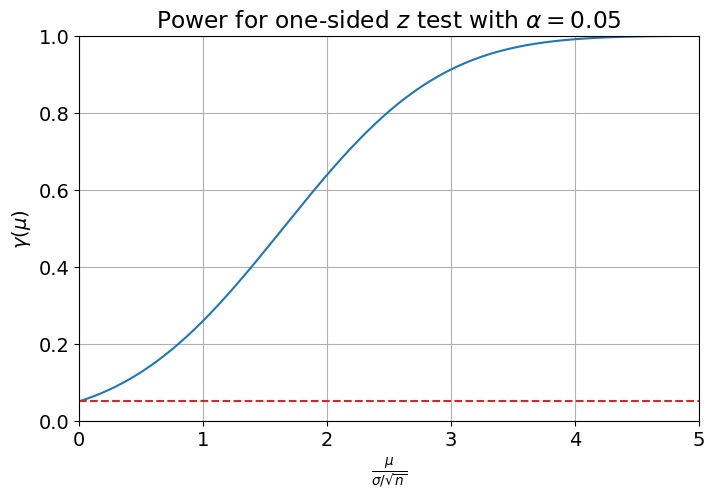

In [11]:
plt.plot(muscaled_m,gamma_m); plt.axhline(0.05,color='C3',ls='--');
plt.xlabel(r'$\frac{\mu}{\sigma/\sqrt{n}}$'); plt.ylabel(r'$\gamma(\mu)$');
plt.title(r'Power for one-sided $z$ test with $\alpha=0.05$');  plt.xlim(0,5); plt.ylim(0,1); plt.grid(True);

- Note $\gamma(0)=0.05=\alpha$.  Also, $\gamma(\mu)>\alpha$ for all $\mu>0$.  Generally desirable (test more likely to reject $H_0$ when it’s false than when it’s true). In general, an **unbiased test** is one for which $\gamma\ge\alpha$ for all possible point hypotheses contained within $H_1$.

We can also estimate this numerically using Monte Carlo methods.  For instance, if we generate data from some distribution with a non-zero $\mu$, we can run the hypothesis test on each of the samples:

In [12]:
mu1scaled = 2.
mu1 = mu1scaled * sigma / np.sqrt(n)
x1_Ii = stats.norm(loc=mu1,scale=sigma).rvs(size=(Nmonte,n))
x1bar_I = np.mean(x1_Ii,axis=-1)
z1_I = x1bar_I/(sigma/np.sqrt(n))
print('Simulating with H_1 (mu=%g), we reject H_0 %d times out of %d, or %g of the time'
      % (mu1,np.sum(z1_I>1.645),Nmonte,np.mean(z1_I>1.645)))
print('compared to a theoretical value of %g' % stats.norm.sf(1.645-mu1scaled))

Simulating with H_1 (mu=1.41421), we reject H_0 635 times out of 1000, or 0.635 of the time
compared to a theoretical value of 0.638705


- To plot a power curve, we should repeat this (construct N=1000 $z^{(I)}$s from samples of $n=50$ points each from $N(\mu,\sigma^2)$ for each of our 501 $\mu$ values.

- But $\mu$ is a location parameter, so adding $\mu$ to $\{x^{(I)}_i\}$ drawn from $N(0,\sigma^2)$ is as good as drawing from $N(\mu,\sigma^2)$ directly.

- Even better, the sample mean is linear, so
$$
\frac{1}{n}\sum_{i=1}^n \left(x^{(I)}_i + \mu\right) = \left(\frac{1}{n}\sum_{i=1}^n x^{(I)}_i\right) + \mu
= \overline{x}^{(I)} + \mu
$$
and we can just add each of the 501 $\mu$s to each of the 1000 $\overline{x}^{(I)}$s generated w/$N(0,\sigma^2)$.

In [13]:
mu_m = muscaled_m * sigma / np.sqrt(n)
x1bar_mI = xbar_I[None,:] + mu_m[:,None]
z1_mI = x1bar_mI / (sigma/np.sqrt(n))
gammaMC_m = np.mean(z1_mI > 1.645, axis=-1)

Array broadcasting magic: we can promote a 1000-element vector to a $1\times1000$ array

In [14]:
x1bar_I.shape, xbar_I[None,:].shape

((1000,), (1, 1000))

And a 501-element vector to a $501\times1$ array

In [15]:
mu_m.shape, mu_m[:,None].shape

((501,), (501, 1))

So that when we add them, we get a $501\times 1000$ array of simulated $\overline{x}^{(I)}$ values, 1000 of them for each of the 501 $\mu$ values to be plotted:

In [16]:
(xbar_I[None,:] + mu_m[:,None]).shape, x1bar_mI.shape

((501, 1000), (501, 1000))

In [17]:
np.mean(z1_mI > 1.645, axis=-1).shape, gammaMC_m.shape

((501,), (501,))

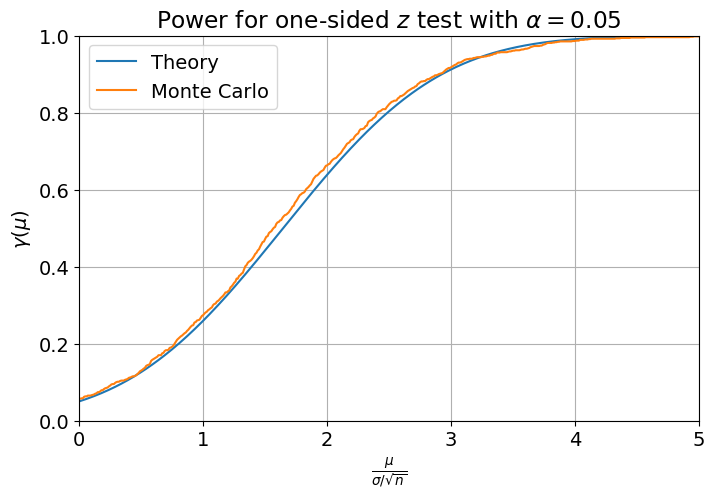

In [18]:
plt.plot(muscaled_m,gamma_m,label='Theory')
plt.plot(muscaled_m,gammaMC_m,label='Monte Carlo')
plt.title(r'Power for one-sided $z$ test with $\alpha=0.05$');plt.xlabel(r'$\frac{\mu}{\sigma/\sqrt{n}}$');
plt.ylabel(r'$\gamma(\mu)$');plt.legend(),plt.xlim(0,5);plt.ylim(0,1);plt.grid(True)

We see that the power curve estimated with the Monte Carlo agrees pretty well with the theoretical one.

- Note that it quickly becomes impractical to calculate power curves analytically.

- Consider the standard $t$-test using the statistic
$${\color{royalblue}{T}} = \frac{{\color{royalblue}{{{\overline{X}}}}}}{\sqrt{{\color{royalblue}{S^2}}/n}}$$
constructed from the sample standard deviation $s$ rather than the
population standard deviation $\sigma$ (which we might not know)

- We know ${\color{royalblue}{T}}$ is Student-$t$ distributed if $\mu=0$, but what if $\mu\ne 0$?
$$\frac{{\color{royalblue}{\overline{X}}} - \mu}{\sqrt{{\color{royalblue}{S^2}}/n}}
={\color{royalblue}{T}} - \frac{\mu}{\sqrt{{\color{royalblue}{S^2}}/n}}$$
is Student-$t$ distributed, but it's not obvious what that means for $\color{royalblue}{T}$ since $\color{royalblue}{S^2}$ is also random.

- We’ll try to address these questions numerically whenever possible.

### $p$-values

- Predefined tests with significance level $\alpha$, fixed rejection regions & power curves are easy to describe, but don't give much information about an actual data set.
- Only result of such a test for an observed sample is “reject $H_0$” or “don’t reject $H_0$”.

- Instead consider how strongly $H_0$ can be rejected for a given observed sample $\{x_i\}$.

- Define the $p$-value, the smallest significance level at which $H_0$ would be rejected (for a given statistic)

- Also the probability that, assuming $H_0$ true, a new sample would give a test statistic at least as extreme as the one seen from the original data.

- Turning things around, a test with significance $\alpha$ tells us to calculate the $p$ value, and reject $H_0$ if $p\le\alpha$.

Going back to our $z$-test example, we can compare $H_0$: $\mu=0$ to
$H_1$: $\mu>0$ by calculating
$z=\frac{{{\overline{x}}}}{\sigma/\sqrt{n}}$ and defining the $p$-value
as $p = P(\color{royalblue}{Z}\ge z|\mu=0) = 1 - \Phi(z)$.

Suppose we have some data:

In [19]:
x_i = np.array([-0.2,-4.5, 8.9, 1.6, 4.5,-2.9, 5.6, 1.5, 8.2, 3.5,-6.7,-2.4, 5.7, 2.5,-1.6, 1.3, 4.4,-0.9,-3.5, 6.6,-3.6,-0.4, 1.4,-4.0,-1.2,-2.3,-4.9, 7.0,-2.7,-1.1, 4.3,-3.7, 1.4,-1.4, 1.1, 2.1, 3.8,-3.0, 1.1,-0.1,11.3, 2.1, 5.5, 1.4,-0.5, 1.8,-0.9,-3.1, 4.0, 5.1])
n = len(x_i); n

50

We calculate the test statistic for those data

In [20]:
z = np.mean(x_i) / (sigma/np.sqrt(n)); z

1.4736105319927653

The $p$-value is the probability that a standard normal will exceed this:

In [21]:
print('p-value is %g'%stats.norm.sf(z))

p-value is 0.0702932


The Monte Carlo construction can help us get a handle on what a $p$-value means.

We can check how often data generated according to the null hypothesis give a statistic at least this large:

In [22]:
print('%d out of %d simulations with H0 have z>=%g so the p-value is %.2f'
      % (np.sum(z_I>=z),Nmonte,z,np.mean(z_I>=z)))
print('Exact p-value is %g'%stats.norm.sf(z))

76 out of 1000 simulations with H0 have z>=1.47361 so the p-value is 0.08
Exact p-value is 0.0702932


Note that if an assignment asks you to test a hypothesis, you should **not** just pick some significance like $\alpha=0.05$ and define a test with a fixed rejection region.  *You should compute the $p$-value*.

#### One-Tailed and Two-Tailed Tests

Our example had a one-sided alternative
hypothesis $H_1$: $\mu>0$, so we rejected $H_0$: $\mu=0$ if the
value of $z$ was too large (a
one-tailed test).

Could instead consider two-sided alternative
hypothesis $H_1$: $\mu\ne 0$ and reject $H_0$ if $z$ is too large *or*
too small. So w/same data, $p$-value would be not
$P({\color{royalblue}{Z}}\mathbin{\ge} 1.47)$ but prob that ${\color{royalblue}{Z}}\ge 1.47$ *or* ${\color{royalblue}{Z}}\le-1.47$,
i.e., $P(|{\color{royalblue}{Z}}|\mathbin{\ge} 1.47)$:

In [23]:
print(('%d out of %d simulations with H0 have z>=%g, and %d have z<=-%g\nso the two-sided p-value is %.2f')
      % (np.sum(z_I>=np.abs(z)),Nmonte,np.abs(z),np.sum(z_I<=-np.abs(z)),np.abs(z),np.mean(np.abs(z_I)>=z)))

76 out of 1000 simulations with H0 have z>=1.47361, and 63 have z<=-1.47361
so the two-sided p-value is 0.14


The theoretical formula is
$$
p=P({\color{royalblue}{Z}}\ge |z|) + P({\color{royalblue}{Z}}\le -|z|) = 1 - \Phi(|z|) + \Phi(-|z|) = 2\bigl(1-\Phi(|z|)\bigr)
$$

In [24]:
print('Exact two-sided p-value is %g'%(2*stats.norm.sf(np.abs(z))))

Exact two-sided p-value is 0.140586


If we want a two-tailed test with $\alpha=0.05$, need to reject $H_0$ if $z>z_{0.975}\approx 1.96$ or $z<z_{0.025}\approx -1.96$.

In [25]:
stats.norm.cdf(-1.96) + stats.norm.sf(1.96)

0.04999579029644087